In [79]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

Source: https://stattrek.com/hypothesis-test/difference-in-proportions?tutorial=AP

Suppose the Acme Drug Company develops a new drug, designed to prevent colds. The company states that the drug is equally effective for men and women. To test this claim, they choose a a simple random sample of 100 women and 200 men from a population of 100,000 volunteers.

At the end of the study, 38% of the women caught a cold; and 51% of the men caught a cold. *Based on these findings, can we reject the company's claim that the drug is equally effective for men and women?* Use a 0.05 level of significance. 

Null hypothesis: P1 = P2

Alternative hypothesis: P1 =/= P2

In [7]:
flu = pd.DataFrame({
    "men": [0.51*200, (1-0.51)*200],
    "women": [0.38*100, (1-0.38)*100],
}, index=["flu", "no_flu"])
flu

,men,women
flu,102.0,38.0
no_flu,98.0,62.0


In [13]:
flu_proportion = flu / flu.sum(axis=0)
flu_proportion

,men,women
flu,0.51,0.38
no_flu,0.49,0.62


In [35]:
observed_diff = flu_proportion.loc["flu", "men"] - flu_proportion.loc["flu", "women"]
print(f"Observed diff in flu proportion = {observed_diff}")

Observed diff in flu proportion = 0.13


In [19]:
print(flu.sum(axis=1))
print("\n")
print(flu.sum(axis=0))

flu       140.0
no_flu    160.0
dtype: float64


men      200.0
women    100.0
dtype: float64


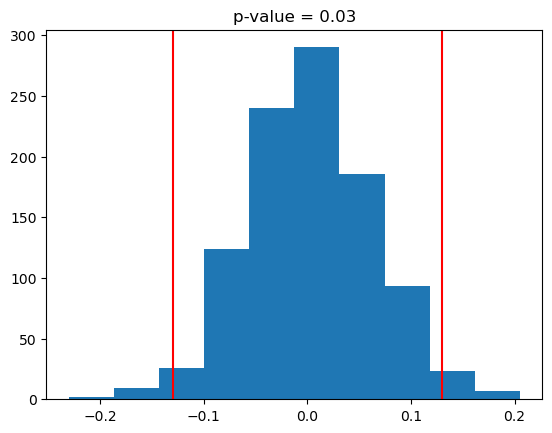

In [95]:
# create a box of flu
num_flu = 140
num_no_flu = 160
box = [1] * 140 + [0] * 160

num_men = 200
num_women = 100

def ab_test_permut_func(box, num_men, num_women):
    # randomly assign box to 200 men and 100 women
    np.random.shuffle(box)
    men_sample = box[:num_men]
    women_sample = box[num_men:]
    assert men_sample + women_sample == box

    # get the proportion of flu from each sample group
    men_sample_flu_prop = np.sum(men_sample) / num_men
    women_sample_flu_prop = np.sum(women_sample) / num_women

    return men_sample_flu_prop - women_sample_flu_prop

# permutation test
perm_diffs = [ab_test_permut_func(box, num_men, num_women) for _ in range(1_000)]

# plot result
plt.hist(perm_diffs, bins= 10)

# p-value of 2-tailed test
area_right_of_observed = np.mean(perm_diffs > observed_diff)
area_left_of_observed = np.mean(perm_diffs < -observed_diff)
p_value = area_right_of_observed + area_left_of_observed
plt.title(f"p-value = {p_value}")

plt.axvline(x=observed_diff, color='red')
plt.axvline(x=-observed_diff, color='red')
plt.show()

In [98]:
# check using stats
flu_men = np.array([1]*102 + [0]*98)
flu_women = np.array([1]*38 + [0]*62)
res = ttest_ind(
    flu_men, 
    flu_women, 
    equal_var= False
)
print(f'p-value for two-sided test: {res.pvalue:.4f}')

p-value for two-sided test: 0.0323


Since the P-value is less than the significance level (0.05), we cannot accept the null hypothesis.